# EDA on Customer Segmentation Dataset

#### Import Releant Libraries and Data Dependancies 

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import Counter, defaultdict

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")
sb.set()

%matplotlib inline

#### Load and Explore Dataset

In [36]:
df = pd.read_excel(r"D:\Open Classroom\Datasets\Customer Segmentation Dataset\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Statistical Analysis

In [37]:
df.shape

(541909, 8)

In [38]:
df.describe().round()

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,10.0,5.0,15288.0
std,218.0,97.0,1714.0
min,-80995.0,-11062.0,12346.0
25%,1.0,1.0,13953.0
50%,3.0,2.0,15152.0
75%,10.0,4.0,16791.0
max,80995.0,38970.0,18287.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [40]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
df.isnull().sum().sum()

136534

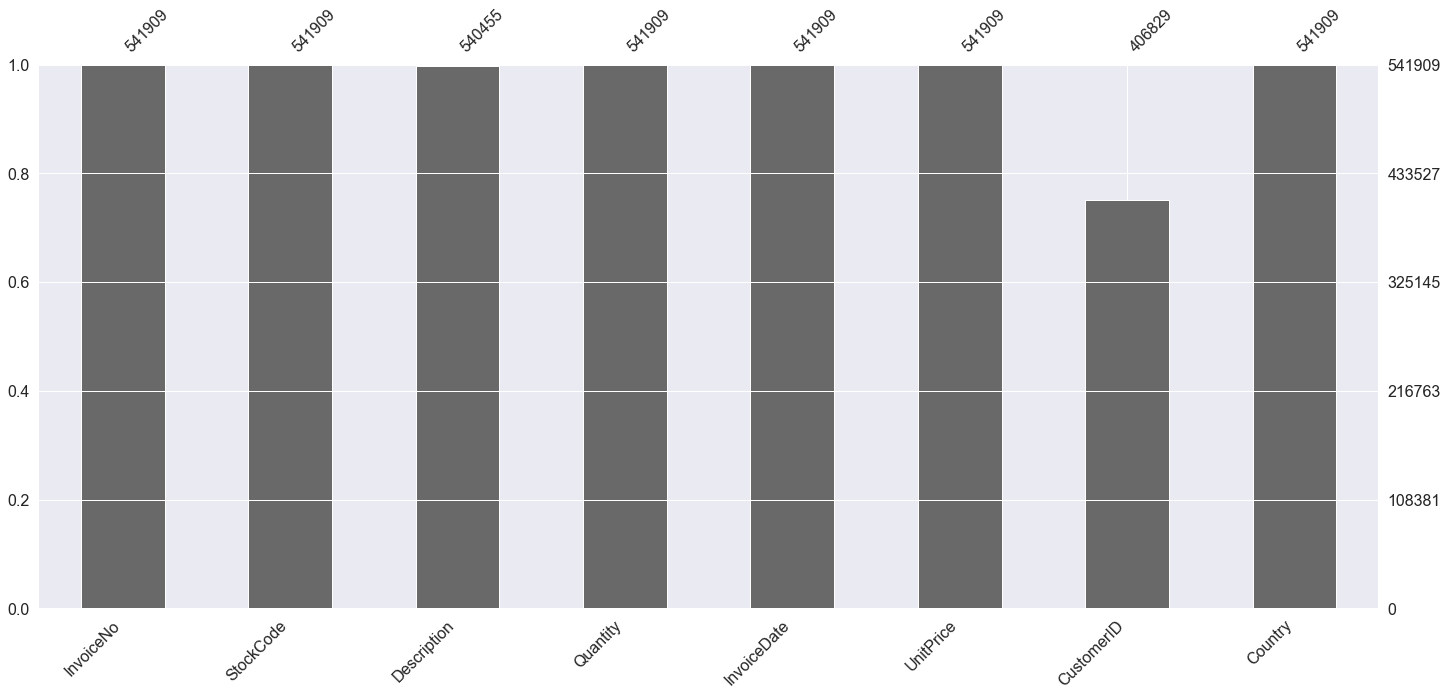

In [42]:
msno.bar(df)

In [43]:
null_values = [i for i in df.columns if df[i].isnull().sum() > 0]

In [44]:
null_values

['Description', 'CustomerID']

In [45]:
for i in null_values:
    if df[i].dtype == 'float64':
        df[i] = df[i].fillna(0)

In [46]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [65]:
for i in null_values:
    if df[i].dtype == 'object':
        si = SimpleImputer(strategy="most_frequent")
        df[i] = si.fit_transform(df[[i]])

In [69]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [71]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
missing_value                         1454
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
Name: Description, dtype: int64

In [72]:
df['CustomerID'].value_counts()

0.0        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13135.0         1
12943.0         1
15313.0         1
17956.0         1
13747.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [77]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 